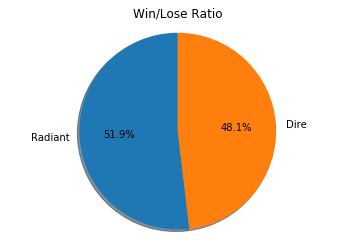

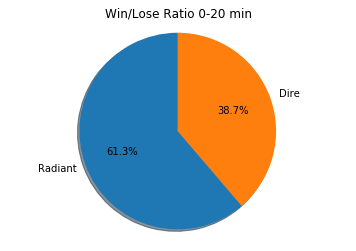

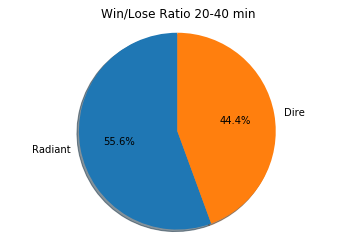

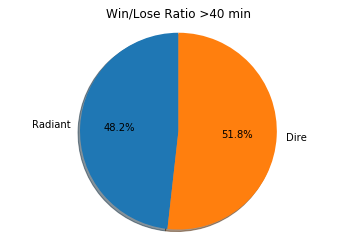

Pogledal sem vpliv strani mape na igro in ugotovil, da imaš če igraš na strani Radiant skoraj 4% boljšo možnost za zmago

Nato sem naredil tudi vpliv strani mape na igro skozi čas in prišel do rezultata, da imajo Radiant v prvih 40 minutah več možnosti za zmago, nato pa se to izravna oziroma grejo možnosti rahlo v prid strani Dire


In [2]:
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


reader = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
radiant = 0
dire = 0
tradiant=[0,0,0,0]
tdire=[0,0,0,0]
for row in reader:
    winner = row["radiant_win"]
    duration = row["duration"]
    if(winner=="True"):
        radiant+=1
        if(int(duration)<=1200):
            tradiant[0] +=1
        elif (int(duration) <= 2400):
            tradiant[1] += 1
        elif (int(duration) <= 3600):
            tradiant[2] += 1
        elif (int(duration) > 3600):
            tradiant[3] += 1

    else:
        dire+=1
        if (int(duration) <= 1200):
            tdire[0] += 1
        elif (int(duration) <= 2400):
            tdire[1] += 1
        elif (int(duration) <= 3600):
            tdire[2] += 1
        elif (int(duration) > 3600):
            tdire[3] += 1


data = [radiant,dire]
x = np.arange(2)

labels = 'Radiant','Dire'

explode = (0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Win/Lose Ratio")
plt.show()


data = [tradiant[0],tdire[0]]
explode = (0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Win/Lose Ratio 0-20 min")
plt.show()

data = [tradiant[1],tdire[1]]
explode = (0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Win/Lose Ratio 20-40 min")
plt.show()



data = [tradiant[3]+tradiant[2],tdire[3]+tdire[2]]
explode = (0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Win/Lose Ratio >40 min")
plt.show()

print("Pogledal sem vpliv strani mape na igro in ugotovil, da imaš če igraš na strani Radiant skoraj 4% boljšo možnost za zmago\n")
print("Nato sem naredil tudi vpliv strani mape na igro skozi čas in prišel do rezultata, da imajo Radiant v prvih 40 minutah več možnosti za zmago, nato pa se to izravna oziroma grejo možnosti rahlo v prid strani Dire")

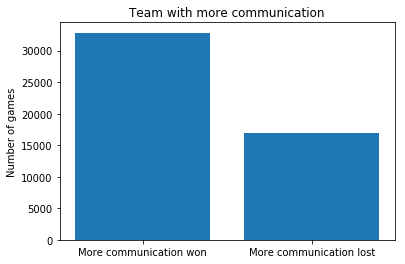

Vzel sem podatke za vsako igro in preštel število chat logov. Izkazalo se je, da je ekipa ki več komunicira zmagala  32846  krat in zgubila  16926  krat
Glede na to, da je komunikacija tako pomembna sem se odločil, da se bom vanjo še malo poglobil.


In [161]:
reader = DictReader(open('podatki/chat.csv', 'rt', encoding='utf-8'))
message_number={}
for row in reader:
    slot = row["slot"]
    message = row["key"]
    match_id = row["match_id"]
    if(message_number.get(match_id)==None):
        if(int(slot)<6):
            message_number[match_id] = (1,0)
        else:
            message_number[match_id] = (0,1)
    else:
        if(int(slot)<6):
            message_number[match_id] = (message_number.get(match_id)[0]+1,message_number.get(match_id)[1])
        else:
            message_number[match_id] = (message_number.get(match_id)[0],message_number.get(match_id)[1]+1)
 
         
Communications_win=[]

reader2 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
for row in reader2:
    radiant_win= row["radiant_win"]
    id = row["match_id"] 
    if(message_number.get(id)!=None):
        if(message_number.get(id)[0]>message_number.get(id)[1] and radiant_win):
            Communications_win.append(True)
        elif(message_number.get(id)[0]<message_number.get(id)[1] and not(radiant_win)):
            Communications_win.append(True)
        else:
            Communications_win.append(False)
            




x = np.arange(2)
plt.bar(x, height= [sum(Communications_win),len(Communications_win)-sum(Communications_win)])
plt.xticks(x, ['More communication won','More communication lost'])
plt.title("Team with more communication")
plt.ylabel('Number of games')
plt.show()

                           

    
print("Vzel sem podatke za vsako igro in preštel število chat logov. Izkazalo se je, da je ekipa ki več komunicira zmagala " , sum(Communications_win) ," krat in zgubila " , len(Communications_win)-sum(Communications_win) ," krat")
print("Glede na to, da je komunikacija tako pomembna sem se odločil, da se bom vanjo še malo poglobil.")    


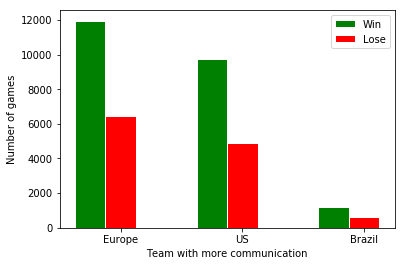

In [176]:


reader6 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
evropejci={}

for row in reader6:
    server = row["cluster"]
    match_id = row["match_id"]
    if(server=="131" or server == "132" or server == "133" or server == "134" or server == "135" or server == "136" or server == "137" or server == "138"):
        evropejci[int(match_id)]="Dota2"




reader = DictReader(open('podatki/chat.csv', 'rt', encoding='utf-8'))
message_number={}

for row in reader:
    slot = row["slot"]
    message = row["key"]
    match_id = row["match_id"]
    if(evropejci.get(int(match_id))!=None):
        if(message_number.get(match_id)==None ):
            if(int(slot)<6):
                message_number[match_id] = (1,0)
            else:
                message_number[match_id] = (0,1)
        else:
            if(int(slot)<6):
                message_number[match_id] = (message_number.get(match_id)[0]+1,message_number.get(match_id)[1])
            else:
                message_number[match_id] = (message_number.get(match_id)[0],message_number.get(match_id)[1]+1)
 
         
Communications_win1=[]

reader2 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
for row in reader2:
    radiant_win= row["radiant_win"]
    id = row["match_id"] 
    if(message_number.get(id)!=None):
        if(message_number.get(id)[0]>message_number.get(id)[1] and radiant_win):
            Communications_win1.append(True)
        elif(message_number.get(id)[0]<message_number.get(id)[1] and not(radiant_win)):
            Communications_win1.append(True)
        else:
            Communications_win1.append(False)
            
reader6 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
evropejci={}

for row in reader6:
    server = row["cluster"]
    match_id = row["match_id"]
    if(server=="131" or server == "111" or server == "112" or server == "113" or server == "121" or server == "122" or server == "123" or server == "124"):
        evropejci[int(match_id)]="Dota2"




reader = DictReader(open('podatki/chat.csv', 'rt', encoding='utf-8'))
message_number={}

for row in reader:
    slot = row["slot"]
    message = row["key"]
    match_id = row["match_id"]
    if(evropejci.get(int(match_id))!=None):
        if(message_number.get(match_id)==None ):
            if(int(slot)<6):
                message_number[match_id] = (1,0)
            else:
                message_number[match_id] = (0,1)
        else:
            if(int(slot)<6):
                message_number[match_id] = (message_number.get(match_id)[0]+1,message_number.get(match_id)[1])
            else:
                message_number[match_id] = (message_number.get(match_id)[0],message_number.get(match_id)[1]+1)
 
         
Communications_win2=[]

reader2 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
for row in reader2:
    radiant_win= row["radiant_win"]
    id = row["match_id"] 
    if(message_number.get(id)!=None):
        if(message_number.get(id)[0]>message_number.get(id)[1] and radiant_win):
            Communications_win2.append(True)
        elif(message_number.get(id)[0]<message_number.get(id)[1] and not(radiant_win)):
            Communications_win2.append(True)
        else:
            Communications_win2.append(False)
            


reader6 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
evropejci={}

for row in reader6:
    server = row["cluster"]
    match_id = row["match_id"]
    if(server=="131" or server == "201" or server == "202" or server == "204"):
        evropejci[int(match_id)]="Dota2"




reader = DictReader(open('podatki/chat.csv', 'rt', encoding='utf-8'))
message_number={}

for row in reader:
    slot = row["slot"]
    message = row["key"]
    match_id = row["match_id"]
    if(evropejci.get(int(match_id))!=None):
        if(message_number.get(match_id)==None ):
            if(int(slot)<6):
                message_number[match_id] = (1,0)
            else:
                message_number[match_id] = (0,1)
        else:
            if(int(slot)<6):
                message_number[match_id] = (message_number.get(match_id)[0]+1,message_number.get(match_id)[1])
            else:
                message_number[match_id] = (message_number.get(match_id)[0],message_number.get(match_id)[1]+1)
 
         
Communications_win3=[]

reader2 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
for row in reader2:
    radiant_win= row["radiant_win"]
    id = row["match_id"] 
    if(message_number.get(id)!=None):
        if(message_number.get(id)[0]>message_number.get(id)[1] and radiant_win):
            Communications_win3.append(True)
        elif(message_number.get(id)[0]<message_number.get(id)[1] and not(radiant_win)):
            Communications_win3.append(True)
        else:
            Communications_win3.append(False)
            







import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [sum(Communications_win1),sum(Communications_win2),sum(Communications_win3)]
bars2 = [len(Communications_win1)-sum(Communications_win1),len(Communications_win2)-sum(Communications_win2),len(Communications_win3)-sum(Communications_win3)]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='Win')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Lose')

 
# Add xticks on the middle of the group bars
plt.xlabel('Team with more communication')
plt.ylabel('Number of games')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Europe', 'US', 'Brazil'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

print("Zanimalo, če ima server oziroma regija igranja močan vpliv, na to, da komunikacija pripelje do zmage. Izkazalo se je, da regija nima posebaj močnega vpliva.")


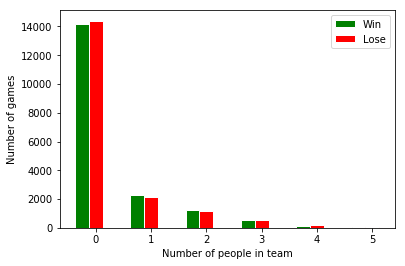

Kot nekdanji igralec igre Dota2, sem tako jaz, kot tudi drugi v veliko igrah opazil ljudi, ki so pisali v cirilici na evropejskih serverjih. Velikokrat sem slišal od profesionalnih igralcev in prijateljev, da so igro zgubili ker so imeli v ekipi Ruse. Odločil sem se, da preverim to statistiko. Vzel sem vse evropejske serverje in za vsakega igralca v trenutni igri pogledal, če se pogovarja v cirilici, nato pa sem te prištel in pogledal, če je ekipa zmagala
Rezultati so pakazali da ta domneva ne drži, oziroma da imaš še kanček več možnosti za zmago, ko imaš na ekipi soigralce, ki uporabljajo cirilico.


In [178]:
reader = DictReader(open('podatki/chat.csv', 'rt', encoding='utf-8'))
message_number={}
cirili = "БбвГгДдЕеЁёЖжЗзИиЙйКкЛлМмНноПпртФфхЦцЧчШшЩщЪъЫыЬьЭэЮюЯя"
cirilica=[]
for c in cirili:
    cirilica.append(c)

def RussianFilter(log,cirilica):
    for c in cirilica:
        if(c in log):
            return True
    return False


reader4 = DictReader(open('podatki/match.csv', 'rt', encoding='utf-8'))
eu_matches={}
for row in reader4:
    match_id = row["match_id"]
    server = row["cluster"]
    radiant_win = row["radiant_win"]
    if(server=="131" or server == "132" or server == "133" or server == "134" or server == "135" or server == "136" or server == "137" or server == "138"):
        eu_matches[match_id] = radiant_win
 



Russians=[0,0,0,0,0,0,0,0,0,0,0,0]

reader = DictReader(open('podatki/chat.csv', 'rt', encoding='utf-8'))
id = -1
rrusians = 0
drusians = 0
players = [False,False,False,False,False,False,False,False,False,False]

for row in reader:
    slot = row["slot"]
    message = row["key"]
    match_id = row["match_id"]
    if(int(match_id)==id):
        if(RussianFilter(message,cirilica)):
            players[int(slot)] = True
    elif(eu_matches.get(match_id)!=None):
        for i in range(5):
            if(players[i]==True):
                rrusians+=1
            if(players[i+5]==True):
                drusians+=1
                
        if(eu_matches.get(match_id)):
            Russians[rrusians*2]+=1
            Russians[drusians*2+1]+=1
            
        else:
            Russians[rrusians*2+1]+=1
            Russians[drusians*2]+=1
        id = int(match_id)
        rrusians = 0
        drusians = 0
        for i in range(10):
            players[i]=False
            
bars1 =[]
bars2 =[]

for i in range(6):
    bars1.append(Russians[i*2])
    bars2.append(Russians[i*2+1])



import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='Win')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Lose')

 
# Add xticks on the middle of the group bars
plt.xlabel('Number of people in team')
plt.ylabel('Number of games')
plt.xticks([r + barWidth for r in range(len(bars1))], ['0', '1', '2', '3', '4','5'])
 
# Create legend & Show graphic
plt.legend()
plt.show()



        

print("Kot nekdanji igralec igre Dota2, sem tako jaz, kot tudi drugi v veliko igrah opazil ljudi, ki so pisali v cirilici na evropejskih serverjih. Velikokrat sem slišal od profesionalnih igralcev in prijateljev, da so igro zgubili ker so imeli v ekipi Ruse. Odločil sem se, da preverim to statistiko. Vzel sem vse evropejske serverje in za vsakega igralca v trenutni igri pogledal, če se pogovarja v cirilici, nato pa sem te prištel in pogledal, če je ekipa zmagala")
print("Rezultati so pakazali da ta domneva ne drži, oziroma da imaš še kanček več možnosti za zmago, ko imaš na ekipi soigralce, ki uporabljajo cirilico.")
 
    
    








Heroje sem razporedil v razrede Carry,Tank,Mage,Support. Šel sem čez vse ekipe, ki so zmagale in pogldedal kakšno kompozicije rollov so imele. Prišel sem do spodnjih rezultatov, vendar rezultati niso zadovoljiv, saj so se nekatere kompozicije zaradi različnih standardov in taktik igrale več kot druge.


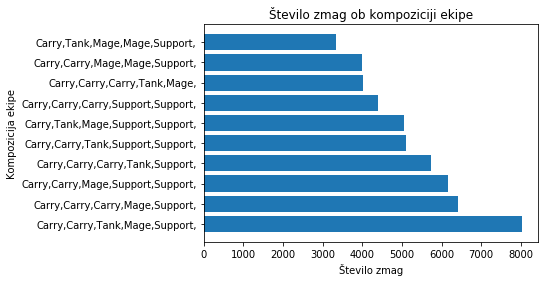

In [98]:
Radiant_win={}

reader = DictReader(open('podatki/test_labels.csv', 'rt', encoding='utf-8'))

for row in reader:
    match_id = int(row["match_id"])
    radiant_win = row["radiant_win"]
    if(radiant_win):
        Radiant_win[match_id]=True
    else:
        Radiant_win[match_id]=False
        

        
reader = DictReader(open('podatki/test_player.csv', 'rt', encoding='utf-8'))

heroes={}

for row in reader:
    match_id = int(row["match_id"])
    slot = int(row["player_slot"])
    hero_id =row["hero_id"]
    
    if(heroes.get(match_id)==None):
        heroes[match_id] = [0,0,0,0,0,0,0,0,0,0]
        heroes.get(match_id)[int(slot)]=int(hero_id)
    else:
        if(int(slot) > 100):
            slot=slot-123
        heroes.get(match_id)[int(slot)]=int(hero_id)
        

            

    
win_heroes={}

reader = DictReader(open('podatki/test_labels.csv', 'rt', encoding='utf-8'))

for row in reader:
    match_id = int(row["match_id"])
    radiant_win = row["radiant_win"]
    if(heroes.get(match_id)!=None):
        a = heroes.get(match_id)
        if(radiant_win):
            win_heroes[match_id]=[a[0],a[1],a[2],a[3],a[4]]
        else:
            win_heroes[match_id]=[a[5],a[6],a[7],a[8],a[9]]
        


        
##1 = Carry || 2=tank || 3 mage || 4 support 

hero_roles=[1,2,4,1,4,1,4,1,1,1,1,1,3,2,3,4,3,1,2,4,4,3,2,3,4,4,2,2,4,4,1,4,3,1,3,4,2,4,4,1,1,3,1,3,1,1,1,1,4,2,3,2,1,2,1,4,4,1,1,2,1,1,4,3,4,1,4,1,1,1,1,1,3,4,3,1,2,4,2,1,1,2,4,2,4,4,3,4,4,4,4,1,1,1,2,2,2,2,2,4,2,2,1,4,1,4,4,1,2,4,4,1]    
roles_match=[]
for key,value in win_heroes.items():
    
    a= win_heroes.get(key)
    if(a[0]>111):
        a[0] = 0
    if(a[1]>111):
        a[1] = 0
    if(a[2]>111):
        a[2] = 0
    if(a[3]>111):
        a[3] = 0
    if(a[4]>111):
        a[4] = 0
    roles_match.append([hero_roles[a[0]],hero_roles[a[1]],hero_roles[a[2]],hero_roles[a[3]],hero_roles[a[4]]])
    
    

for i in range(len(roles_match)):
    roles_match[i].sort()

    
num_wins={}
for i in range(len(roles_match)):
    a = str(roles_match[i][0])+str(roles_match[i][1])+str(roles_match[i][2])+str(roles_match[i][3])+str(roles_match[i][4])
    if(num_wins.get(a)==None):
        num_wins[a] = 1
    else:
        num_wins[a] = num_wins.get(a)+1
   

comp_wins=[]

for key,value in num_wins.items():
    comp_wins.append((key,value))
    



import operator
comp_wins.sort(key = operator.itemgetter(1), reverse=True)

    
    
ekipa=[]
st_zmag=[]
for i in comp_wins:
    ekipa.append(i[0])
    st_zmag.append(i[1])
    
for i in range(len(ekipa)):
    word=""
    for char in ekipa[i]:
        if(char=="1"):
            word+="Carry,"
        if(char=="2"):
            word+="Tank,"
        if(char=="3"):
            word+="Mage,"
        if(char=="4"):
            word+="Support,"
    ekipa[i]=word

    




    
    
    
    
    
    
    


plt.barh(ekipa[:10],st_zmag[:10])
plt.title("Število zmag ob kompoziciji ekipe")
plt.xlabel('Število zmag')
plt.ylabel('Kompozicija ekipe')


    
print("Heroje sem razporedil v razrede Carry,Tank,Mage,Support. Šel sem čez vse ekipe, ki so zmagale in pogldedal kakšno kompozicije rollov so imele. Prišel sem do spodnjih rezultatov, vendar rezultati niso zadovoljiv, saj so se nekatere kompozicije zaradi različnih standardov in taktik igrale več kot druge.")
    

Šel sem čez vse igre, in iz njih vzel kompozicije ekip. Preštel sem kolikokrat je ista kompozicija zmagala in kolikokrat zgubila. Na graf sem izpisal vse kompozicije katere so imele seštevek zmag in porazov večji od 500.
Izkaže se da najbolj igrana kompozicija ne pride na seznam top 10 najbolj zmagovalnih kompozicij, je to morda prav zato ker jo vsi igrajo?


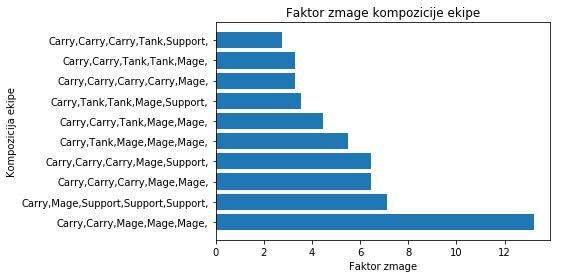

In [99]:
Radiant_win={}

reader = DictReader(open('podatki/test_labels.csv', 'rt', encoding='utf-8'))

for row in reader:
    match_id = int(row["match_id"])
    radiant_win = row["radiant_win"]
    if(radiant_win):
        Radiant_win[match_id]=True
    else:
        Radiant_win[match_id]=False
        

        
reader = DictReader(open('podatki/test_player.csv', 'rt', encoding='utf-8'))

heroes={}

for row in reader:
    match_id = int(row["match_id"])
    slot = int(row["player_slot"])
    hero_id =row["hero_id"]
    
    if(heroes.get(match_id)==None):
        heroes[match_id] = [0,0,0,0,0,0,0,0,0,0]
        heroes.get(match_id)[int(slot)]=int(hero_id)
    else:
        if(int(slot) > 100):
            slot=slot-123
        heroes.get(match_id)[int(slot)]=int(hero_id)
        

            

    
win_heroes={}

reader = DictReader(open('podatki/test_labels.csv', 'rt', encoding='utf-8'))

for row in reader:
    match_id = int(row["match_id"])
    radiant_win = row["radiant_win"]
    if(heroes.get(match_id)!=None):
        a = heroes.get(match_id)
        if(radiant_win):
            win_heroes[match_id]=[a[0],a[1],a[2],a[3],a[4]]
            win_heroes[-match_id]=[a[5],a[6],a[7],a[8],a[9]]
        else:
            win_heroes[-match_id]=[a[0],a[1],a[2],a[3],a[4]]
            win_heroes[match_id]=[a[5],a[6],a[7],a[8],a[9]]
        


        
##1 = Carry || 2=tank || 3 mage || 4 support 

hero_roles=[1,2,4,1,4,1,4,1,1,1,1,1,3,2,3,4,3,1,2,4,4,3,2,3,4,4,2,2,4,4,1,4,3,1,3,4,2,4,4,1,1,3,1,3,1,1,1,1,4,2,3,2,1,2,1,4,4,1,1,2,1,1,4,3,4,1,4,1,1,1,1,1,3,4,3,1,2,4,2,1,1,2,4,2,4,4,3,4,4,4,4,1,1,1,2,2,2,2,2,4,2,2,1,4,1,4,4,1,2,4,4,1]    
winning_comps=[]
losing_comps=[]
for key,value in win_heroes.items():
    
    a= win_heroes.get(key)
    if(a[0]>111):
        a[0] = 0
    if(a[1]>111):
        a[1] = 0
    if(a[2]>111):
        a[2] = 0
    if(a[3]>111):
        a[3] = 0
    if(a[4]>111):
        a[4] = 0
    if(key>0):
        winning_comps.append([hero_roles[a[0]],hero_roles[a[1]],hero_roles[a[2]],hero_roles[a[3]],hero_roles[a[4]]])
    else:
        losing_comps.append([hero_roles[a[0]],hero_roles[a[1]],hero_roles[a[2]],hero_roles[a[3]],hero_roles[a[4]]])
    
    
    

for i in range(len(winning_comps)):
    winning_comps[i].sort()
    
for i in range(len(losing_comps)):
    losing_comps[i].sort()

    
num_wins={}
num_loses={}

for i in range(len(winning_comps)):
    a = str(winning_comps[i][0])+str(winning_comps[i][1])+str(winning_comps[i][2])+str(winning_comps[i][3])+str(winning_comps[i][4])
    if(num_wins.get(a)==None):
        num_wins[a] = 1
    else:
        num_wins[a] = num_wins.get(a)+1
        
for i in range(len(losing_comps)):
    a = str(losing_comps[i][0])+str(losing_comps[i][1])+str(losing_comps[i][2])+str(losing_comps[i][3])+str(losing_comps[i][4])
    if(num_loses.get(a)==None):
        num_loses[a] = 1
    else:
        num_loses[a] = num_loses.get(a)+1
        

   
n = len(comp_wins)
comp_wins=[]
comp_loses=[]
comp_win_n= [0] *n


for key,value in num_wins.items():
    comp_wins.append((key,value))
    
for key,value in num_loses.items():
    comp_loses.append((key,value))
    

     
for i in range(len(comp_loses)):
    for j in range(len(comp_wins)):
        if(comp_loses[i][0]==comp_wins[j][0]):
            comp_wins[i] = (comp_wins[i][0],comp_wins[i][1],comp_loses[i][1],comp_wins[i][1]+comp_loses[i][1],comp_wins[i][1]/comp_loses[i][1])


import operator
comp_wins.sort(key = operator.itemgetter(4), reverse=True)   



name=[]
win_proc=[]
for item in comp_wins:
    if(item[3]>500):
        name.append(item[0])
        win_proc.append(item[4])
        
        

        
for i in range(len(name)):
    word=""
    for char in name[i]:
        if(char=="1"):
            word+="Carry,"
        if(char=="2"):
            word+="Tank,"
        if(char=="3"):
            word+="Mage,"
        if(char=="4"):
            word+="Support,"
    name[i]=word
    



plt.barh(name[1:11],win_proc[1:11])
plt.title("Faktor zmage kompozicije ekipe")
plt.xlabel('Faktor zmage')
plt.ylabel('Kompozicija ekipe')


print("Šel sem čez vse igre, in iz njih vzel kompozicije ekip. Preštel sem kolikokrat je ista kompozicija zmagala in kolikokrat zgubila. Na graf sem izpisal vse kompozicije katere so imele seštevek zmag in porazov večji od 500.")
print("Izkaže se da najbolj igrana kompozicija ne pride na seznam top 10 najbolj zmagovalnih kompozicij, je to morda prav zato ker jo vsi igrajo?")


    




    